# Lista 2

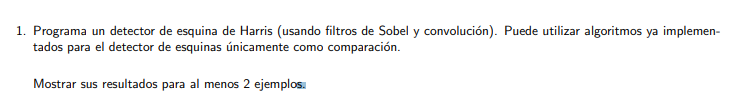

In [2]:
import cv2
import numpy as np

def harris_corner_detector(image_path, threshold=0.1):  # Ajustamos el valor del umbral
    # Cargar la imagen y convertirla a escala de grises
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Calcular las derivadas espaciales x e y usando los filtros de Sobel
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular productos de derivadas en cada punto
    grad_xx = grad_x ** 2
    grad_yy = grad_y ** 2
    grad_xy = grad_x * grad_y

    # Aplicar suavizado Gaussiano a los productos de derivadas
    grad_xx = cv2.GaussianBlur(grad_xx, (3, 3), 0)
    grad_yy = cv2.GaussianBlur(grad_yy, (3, 3), 0)
    grad_xy = cv2.GaussianBlur(grad_xy, (3, 3), 0)

    # Calcular la matriz de Harris y la respuesta de cada píxel
    k = 1
    harris_response = (grad_xx * grad_yy - grad_xy ** 2) - k * (grad_xx + grad_yy) ** 2

    # Normalizar la respuesta de Harris
    harris_response = cv2.normalize(harris_response, None, 0, 255, cv2.NORM_MINMAX)

    # Umbral para un valor máximo y marcar las esquinas
    for i in range(harris_response.shape[0]):
        for j in range(harris_response.shape[1]):
            if harris_response[i,j] > threshold * harris_response.max():
                cv2.circle(img, (j, i), 5, (0, 255, 0), 1)

    # Mostrar el resultado
    cv2.imshow('Harris Corners', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

# Uso del detector
image_path = 'forest.jpg' # Cambia esto por la ruta de tu imagen
harris_corner_detector(image_path)


KeyboardInterrupt: 